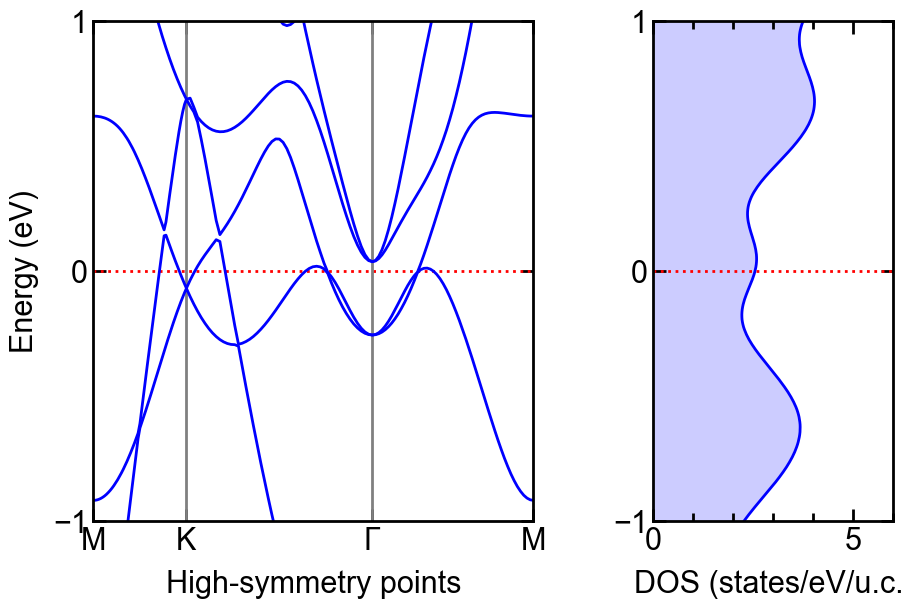

In [1]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
plt.style.use('matplotlib/sci.mplstyle')
import numpy as np
import matplotlib as mpl

# Initialize figure
fig = plt.figure(figsize=(8, 5))

# Add two axes objects to create a paneled figure
# format: (originX, originY, widthX, widthY)
axBand = fig.add_axes([0,    0, 0.55, 1])
axDOS  = fig.add_axes([0.70, 0, 0.30, 1])

# PLOT EBANDS

# The Fermi energy, find it in scf.out
efermi = 13.1482

# Load data from gr.bands.gnu
data = np.loadtxt('TiS.bands.gnu')
k = np.unique(data[:, 0])
bands = np.reshape(data[:, 1], (-1, len(k)))
    
# Set high-symmetry points from nscf.in
gG1 = k[0]; K = k[50]; gG3 = k[100]; gG2 = k[150]

# Plot dotted line at Fermi energy
axBand.axhline(0, c='red', ls=':')
# Plot dotted lines at high-symmetry points
axBand.axvline(K, c='gray')
axBand.axvline(gG3, c='gray')

# Plot band structure
for band in range(len(bands)):
    axBand.plot(k, bands[band, :]-efermi, c='b')

# Add the x and y-axis labels
axBand.set_xlabel('High-symmetry points')
axBand.set_ylabel('Energy (eV)')
# Set the axis limits
axBand.set_xlim(gG1, gG2)
axBand.set_ylim (-1, 1)
# Add labels for high-symmetry points
axBand.set_xticks([gG1, K, gG3, gG2], ['M', 'K','$\Gamma$','M'])
# Hide x-axis minor ticks
axBand.tick_params(axis='x', which='minor', bottom=False, top=False)
# Better ticks for y-axis
axBand.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
axBand.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2))

# PLOT DOS

# The Fermi energy, find it in header row of gr.dos
efermi = 13.1958

# Open and read the file gr.dos
ener, dos, idos = np.loadtxt('TiS.dos', unpack=True)
    
# Plot the DOS, in which the Fermi energy shifts to zero
axDOS.plot(dos, ener-efermi, color='blue')
axDOS.fill_betweenx(ener-efermi, 0, dos, facecolor='blue', alpha=0.2)


# Plot dotted line at Fermi energy
axDOS.axhline(0, c='red', ls=':')

# Add the x and y-axis labels
axDOS.set_xlabel('DOS (states/eV/u.c.)')
#axDOS.set_ylabel('Energy (eV)')
# Set the axis limits
axDOS.set_xlim(0,6)
axDOS.set_ylim(-1, 1)
# Better ticks for y-axis
axDOS.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
axDOS.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2))

# ADD PANEL LABELS (a) AND (b)
#axBand.text(-0.3, 1.11,'(a)')
#axDOS.text( -2, 1.11,'(b)')

#plt.savefig('plot-merge.pdf', bbox_inches='tight')
